In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

<IPython.core.display.Javascript object>


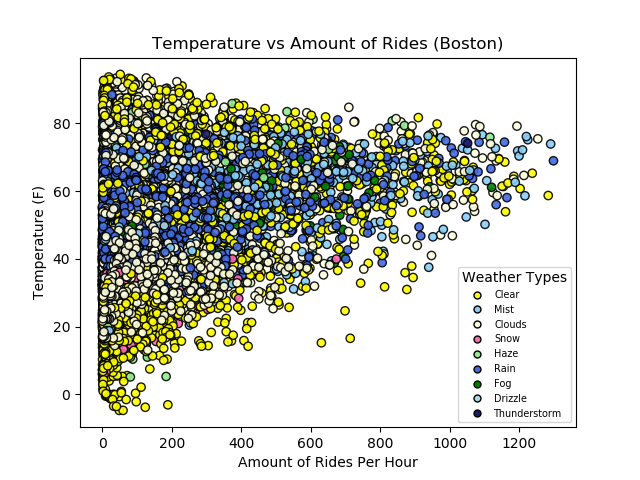

In [3]:
bos = "Resources/HourlyWeatherBostonMerged.csv"

df = pd.read_csv(bos)

temp = []
rides = []
duration = []
color = []
for row in df['avg_temp_f']:
    temp.append(row)
    
for row in df['Amount of Rides']:   
    rides.append(row)
    
for row in df['Average Trip Duration']: 
    duration.append(row)


col_dict = {1:'yellow', 2:'lightyellow', 3:'lightblue', 
            4:'green', 5:'lightgreen', 6:'lightskyblue',
            7:'royalblue', 8:'hotpink', 9:'midnightblue'} 

weather_dict = {1:"Clear", 2:"Clouds", 3:"Drizzle", 
            4:"Fog", 5:"Haze", 6:"Mist",
            7:"Rain", 8:"Snow", 9:"Thunderstorm"}

df['Color'] = df['weather_type'].map(col_dict) 
df['Weather Name'] = df['weather_type'].map(weather_dict)
    
plt.scatter(rides, temp, marker="o", 
            c=df.Color,
            edgecolors="black", 
            alpha=.9, label=df.Color)
plt.title("Temperature vs Amount of Rides (Boston)")
plt.xlabel("Amount of Rides Per Hour")
plt.ylabel("Temperature (F)")

colors_list=list(df['Color'].unique()) 
weather_list=list(df['Weather Name'].unique())

patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec="Black", color=colors_list[i], 
            label="{:s}".format(weather_list[i]) )[0]  for i in range(len(weather_list)) ]

plt.legend(title="Weather Types", handles=patches, loc='best',fontsize='x-small')
plt.savefig("../Output_images/Bos_Temp_Scat.png")
